In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression
df = pd.read_csv("car_price_dataset.csv")

Matplotlib is building the font cache; this may take a moment.


In [2]:
df

Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3            5   8501  
1        5356      2            3  12092  
2      231440      4            2  11171  
3      160971      2            1  11780  
4      286618      3            3   2867  
...       ...    ...          ...    ...  
9995     5794      2            4   8884  
9996   168000      2            1   6240  
9997    86664      5            1   9866  
9998   225772      4            1   4084  
9999   157882      3            3   3342  

[10000 rows x 10 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 625.1+ KB


In [4]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [5]:
Brand=pd.get_dummies(df['Brand'])

In [6]:
print(Brand)

       Audi    BMW  Chevrolet   Ford  Honda  Hyundai    Kia  Mercedes  Toyota  \
0     False  False      False  False  False    False   True     False   False   
1     False  False       True  False  False    False  False     False   False   
2     False  False      False  False  False    False  False      True   False   
3      True  False      False  False  False    False  False     False   False   
4     False  False      False  False  False    False  False     False   False   
...     ...    ...        ...    ...    ...      ...    ...       ...     ...   
9995  False  False      False  False  False    False   True     False   False   
9996  False  False       True  False  False    False  False     False   False   
9997  False   True      False  False  False    False  False     False   False   
9998  False  False      False   True  False    False  False     False   False   
9999  False  False      False  False  False    False  False     False   False   

      Volkswagen  
0       

In [7]:
Model=pd.get_dummies(df['Model'])

In [8]:
print(Model)

      3 Series  5 Series     A3     A4  Accord  C-Class   CR-V  Camry  Civic  \
0        False     False  False  False   False    False  False  False  False   
1        False     False  False  False   False    False  False  False  False   
2        False     False  False  False   False    False  False  False  False   
3        False     False  False  False   False    False  False  False  False   
4        False     False  False  False   False    False  False  False  False   
...        ...       ...    ...    ...     ...      ...    ...    ...    ...   
9995     False     False  False  False   False    False  False  False  False   
9996     False     False  False  False   False    False  False  False  False   
9997      True     False  False  False   False    False  False  False  False   
9998     False     False  False  False   False    False  False  False  False   
9999     False     False  False  False   False    False  False  False  False   

      Corolla  ...  Optima  Passat     

In [9]:
Fuel_Type=pd.get_dummies(df['Fuel_Type'])

In [10]:
print(Fuel_Type)

      Diesel  Electric  Hybrid  Petrol
0       True     False   False   False
1      False     False    True   False
2       True     False   False   False
3      False      True   False   False
4      False     False    True   False
...      ...       ...     ...     ...
9995    True     False   False   False
9996   False      True   False   False
9997   False     False   False    True
9998   False     False    True   False
9999    True     False   False   False

[10000 rows x 4 columns]


In [11]:
Transmission=pd.get_dummies(df['Transmission'])

In [12]:
print(Transmission)

      Automatic  Manual  Semi-Automatic
0         False    True           False
1          True   False           False
2          True   False           False
3         False    True           False
4         False   False            True
...         ...     ...             ...
9995      False   False            True
9996       True   False           False
9997       True   False           False
9998       True   False           False
9999      False    True           False

[10000 rows x 3 columns]


In [13]:
df.drop(['Brand','Model','Fuel_Type','Transmission'],axis=1,inplace=True)

In [14]:
df=pd.concat([df,Brand,Model,Fuel_Type,Transmission],axis=1)

In [15]:
df

Year  Engine_Size  Mileage  Doors  Owner_Count  Price   Audi    BMW  \
0     2020          4.2   289944      3            5   8501  False  False   
1     2012          2.0     5356      2            3  12092  False  False   
2     2020          4.2   231440      4            2  11171  False  False   
3     2023          2.0   160971      2            1  11780   True  False   
4     2003          2.6   286618      3            3   2867  False  False   
...    ...          ...      ...    ...          ...    ...    ...    ...   
9995  2004          3.7     5794      2            4   8884  False  False   
9996  2002          1.4   168000      2            1   6240  False  False   
9997  2010          3.0    86664      5            1   9866  False   True   
9998  2002          1.4   225772      4            1   4084  False  False   
9999  2001          2.1   157882      3            3   3342  False  False   

      Chevrolet   Ford  ...  Tiguan  Tucson     X5  Diesel  Electric  Hybrid  \
0         False  False  ...   False   False  False    True     False   False   
1          True  False  ...   False   False  False   False     False    True   
2         False  False  ...   False   False  False    True     False   False   
3         False  False  ...   False   False  False   False      True   False   
4         False  False  ...   False   False  False   False     False    True   
...         ...    ...  ...     ...     ...    ...     ...       ...     ...   
9995      False  False  ...   False   False  False    True     False   False   
9996       True  False  ...   False   False  False   False      True   False   
9997      False  False  ...   False   False  False   False     False   False   
9998      False   True  ...   False   False  False   False     False    True   
9999      False  False  ...    True   False  False    True     False   False   

      Petrol  Automatic  Manual  Semi-Automatic  
0      False      False    True           False  
1      False       True   False           False  
2      False       True   False           False  
3      False      False    True           False  
4      False      False   False            True  
...      ...        ...     ...             ...  
9995   False      False   False            True  
9996   False       True   False           False  
9997    True       True   False           False  
9998   False       True   False           False  
9999   False      False    True           False  

[10000 rows x 53 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            10000 non-null  int64  
 1   Engine_Size     10000 non-null  float64
 2   Mileage         10000 non-null  int64  
 3   Doors           10000 non-null  int64  
 4   Owner_Count     10000 non-null  int64  
 5   Price           10000 non-null  int64  
 6   Audi            10000 non-null  bool   
 7   BMW             10000 non-null  bool   
 8   Chevrolet       10000 non-null  bool   
 9   Ford            10000 non-null  bool   
 10  Honda           10000 non-null  bool   
 11  Hyundai         10000 non-null  bool   
 12  Kia             10000 non-null  bool   
 13  Mercedes        10000 non-null  bool   
 14  Toyota          10000 non-null  bool   
 15  Volkswagen      10000 non-null  bool   
 16  3 Series        10000 non-null  bool   
 17  5 Series        10000 non-null  

In [17]:
df.isnull().sum()

Year              0
Engine_Size       0
Mileage           0
Doors             0
Owner_Count       0
Price             0
Audi              0
BMW               0
Chevrolet         0
Ford              0
Honda             0
Hyundai           0
Kia               0
Mercedes          0
Toyota            0
Volkswagen        0
3 Series          0
5 Series          0
A3                0
A4                0
Accord            0
C-Class           0
CR-V              0
Camry             0
Civic             0
Corolla           0
E-Class           0
Elantra           0
Equinox           0
Explorer          0
Fiesta            0
Focus             0
GLA               0
Golf              0
Impala            0
Malibu            0
Optima            0
Passat            0
Q5                0
RAV4              0
Rio               0
Sonata            0
Sportage          0
Tiguan            0
Tucson            0
X5                0
Diesel            0
Electric          0
Hybrid            0
Petrol            0


In [18]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('Price',axis='columns'),df.Price)

LinearRegression()

In [19]:
reg.coef_

array([ 2.98601356e+02,  9.92739310e+02, -1.98902053e-02, -5.50438928e-01,
        3.58753104e-02,  1.46745954e+08, -7.21953201e+06,  1.40319367e+07,
        4.99867396e+06, -2.80423776e+07,  1.24859538e+08,  6.17600244e+07,
        7.79187798e+07,  6.41981871e+07,  7.68430621e+07,  1.01720863e+08,
        1.01720855e+08, -5.22446243e+07, -5.22446286e+07,  1.22543712e+08,
        1.65825527e+07,  1.22543712e+08,  3.03031379e+07,  1.22543719e+08,
        3.03031409e+07,  1.65825499e+07, -3.03582108e+07,  8.04693897e+07,
        8.95026575e+07,  8.95026552e+07,  8.95026584e+07,  1.65825596e+07,
        1.76582665e+07,  8.04693947e+07,  8.04693927e+07,  3.27413123e+07,
        1.76582674e+07, -5.22446264e+07,  3.03031488e+07,  3.27413124e+07,
       -3.03582096e+07,  3.27413129e+07,  1.76582665e+07, -3.03582070e+07,
        1.01720868e+08,  1.72822046e+08,  1.72824034e+08,  1.72823036e+08,
        1.72822047e+08, -3.73861204e+07, -3.73876106e+07, -3.73876123e+07])

In [20]:
reg.intercept_

np.float64(-230528830.6663387)

In [21]:
print("Dataset Info:")
df.info()
print("\nFirst five rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            10000 non-null  int64  
 1   Engine_Size     10000 non-null  float64
 2   Mileage         10000 non-null  int64  
 3   Doors           10000 non-null  int64  
 4   Owner_Count     10000 non-null  int64  
 5   Price           10000 non-null  int64  
 6   Audi            10000 non-null  bool   
 7   BMW             10000 non-null  bool   
 8   Chevrolet       10000 non-null  bool   
 9   Ford            10000 non-null  bool   
 10  Honda           10000 non-null  bool   
 11  Hyundai         10000 non-null  bool   
 12  Kia             10000 non-null  bool   
 13  Mercedes        10000 non-null  bool   
 14  Toyota          10000 non-null  bool   
 15  Volkswagen      10000 non-null  bool   
 16  3 Series        10000 non-null  bool   
 17  5 Series        10

In [22]:
print("\Summary staticstics:")
print(df.describe())

<unknown>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
<ipython-input-22-2c306a2a01eb>:1: SyntaxWarning: invalid escape sequence '\S'
  print("\Summary staticstics:")


\Summary staticstics:
               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000  


In [23]:
print("\Missing values:")
print(df.isnull().sum())

<unknown>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
<ipython-input-23-adb55e5867d0>:1: SyntaxWarning: invalid escape sequence '\M'
  print("\Missing values:")


\Missing values:
Year              0
Engine_Size       0
Mileage           0
Doors             0
Owner_Count       0
Price             0
Audi              0
BMW               0
Chevrolet         0
Ford              0
Honda             0
Hyundai           0
Kia               0
Mercedes          0
Toyota            0
Volkswagen        0
3 Series          0
5 Series          0
A3                0
A4                0
Accord            0
C-Class           0
CR-V              0
Camry             0
Civic             0
Corolla           0
E-Class           0
Elantra           0
Equinox           0
Explorer          0
Fiesta            0
Focus             0
GLA               0
Golf              0
Impala            0
Malibu            0
Optima            0
Passat            0
Q5                0
RAV4              0
Rio               0
Sonata            0
Sportage          0
Tiguan            0
Tucson            0
X5                0
Diesel            0
Electric          0
Hybrid            0
Pet

In [24]:
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    Year  Engine_Size   Mileage     Doors  Owner_Count  \
Year            1.000000    -0.001306 -0.002476  0.014867     0.000116   
Engine_Size    -0.001306     1.000000  0.015135 -0.009844     0.007122   
Mileage        -0.002476     0.015135  1.000000  0.007879     0.006287   
Doors           0.014867    -0.009844  0.007879  1.000000    -0.005431   
Owner_Count     0.000116     0.007122  0.006287 -0.005431     1.000000   
Price           0.663036     0.357403 -0.551227  0.000511     0.002656   
Audi            0.013293     0.009591  0.006841 -0.006790    -0.010316   
BMW            -0.020653    -0.006865  0.002861 -0.008593    -0.037532   
Chevrolet       0.016394    -0.001988 -0.009663  0.005221     0.002323   
Ford           -0.003493     0.013015  0.005594  0.004717     0.012009   
Honda          -0.008549    -0.021743  0.012364  0.002221    -0.002805   
Hyundai         0.001066    -0.018475  0.002302  0.004329     0.003723   
Kia            -0

In [25]:
sns.set_style("whitegrid")

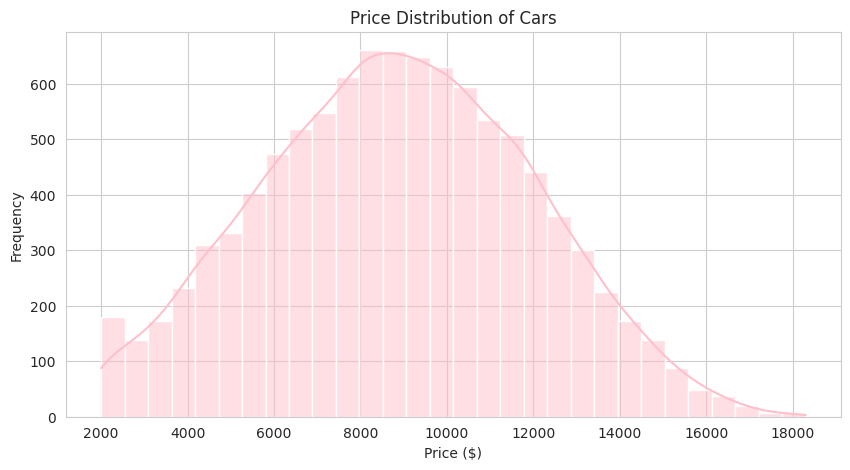

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price'],bins=30,kde=True,color="pink")
plt.title("Price Distribution of Cars")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

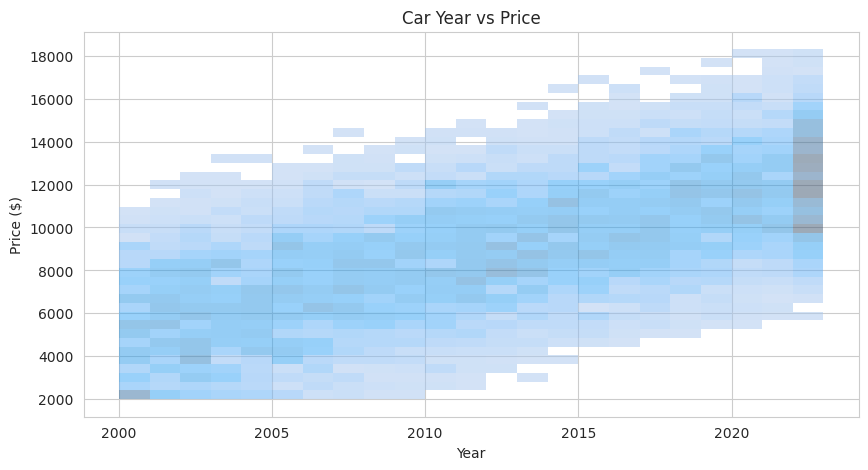

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['Year'],y=df['Price'],alpha=0.5)
plt.title("Car Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.show()

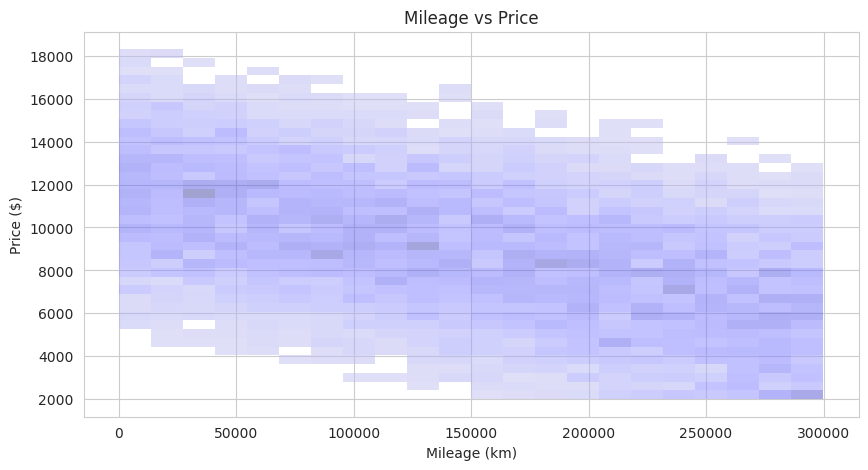

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['Mileage'],y=df['Price'],alpha=0.5,color="blue")
plt.title("Mileage vs Price")
plt.xlabel("Mileage (km)")
plt.ylabel("Price ($)")
plt.show()

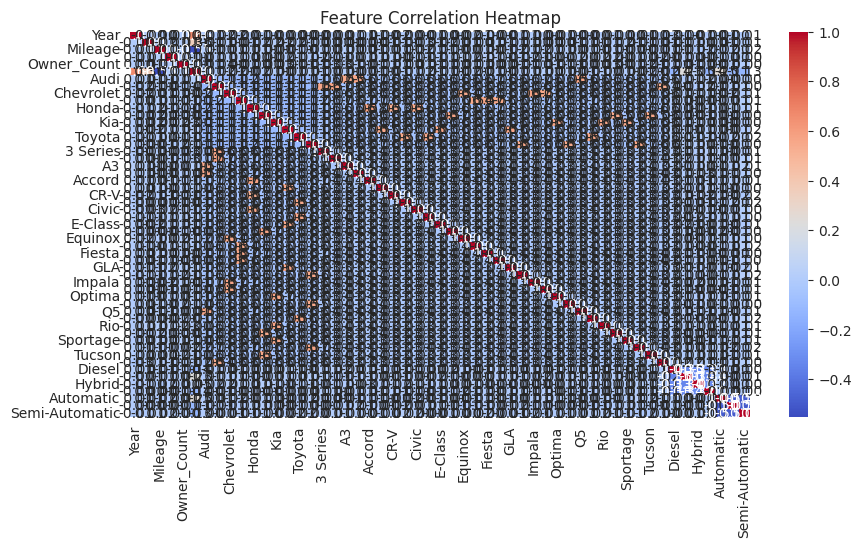

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=" .2f")
plt.title("Feature Correlation Heatmap")
plt.show()

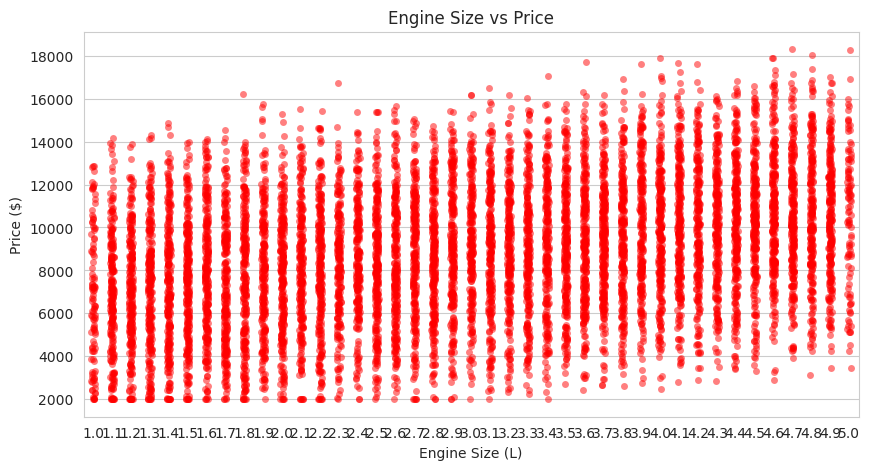

In [30]:
plt.figure(figsize=(10, 5))
sns.stripplot(x=df["Engine_Size"], y=df["Price"], jitter=True, alpha=0.5,color='red')
plt.title("Engine Size vs Price")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price ($)")
plt.show()

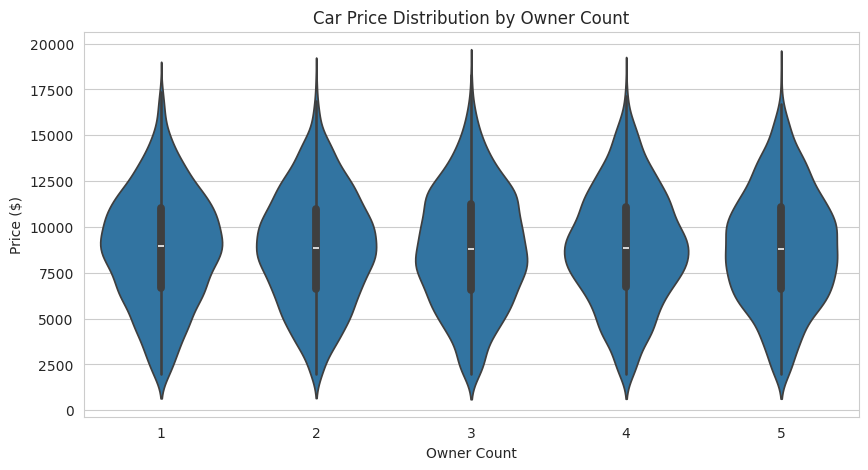

In [31]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df["Owner_Count"], y=df["Price"])
plt.title("Car Price Distribution by Owner Count")
plt.xlabel("Owner Count")
plt.ylabel("Price ($)")
plt.show()

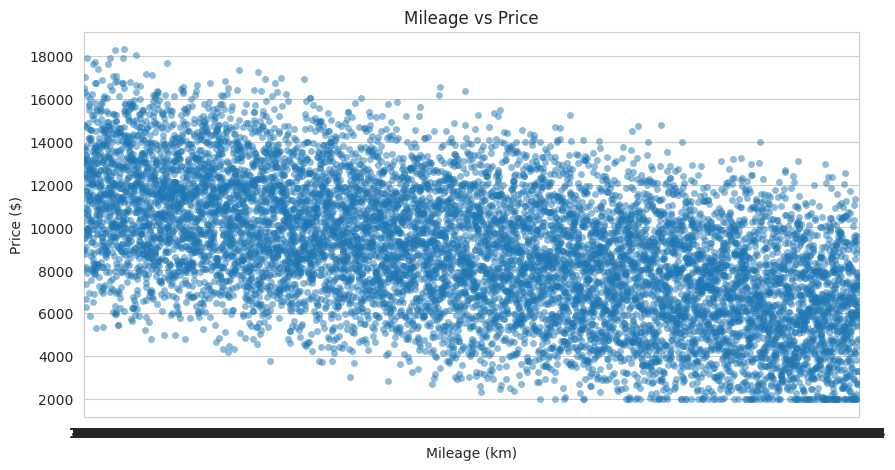

In [32]:
plt.figure(figsize=(10, 5))
sns.stripplot(x=df["Mileage"], y=df["Price"], jitter=True, alpha=0.5)
plt.title("Mileage vs Price")
plt.xlabel("Mileage (km)")
plt.ylabel("Price ($)")
plt.show()

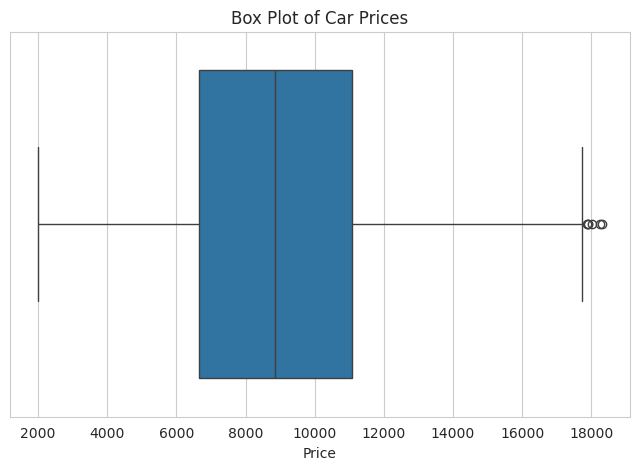

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.title("Box Plot of Car Prices")
plt.show()

<ipython-input-35-9f372e7feebf>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True)


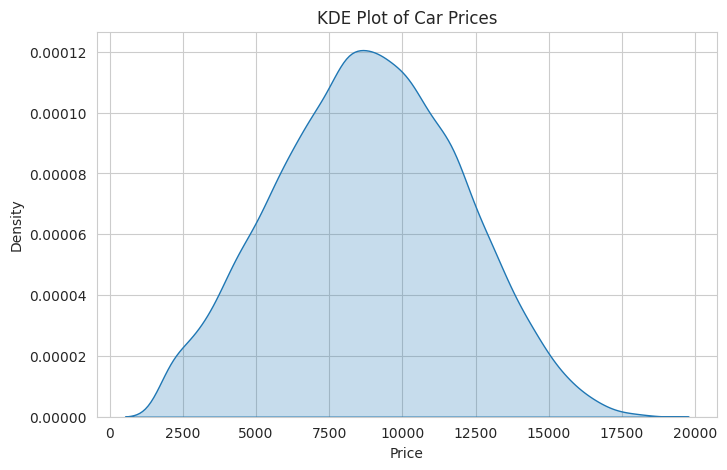

In [35]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Price'], shade=True)
plt.title("KDE Plot of Car Prices")
plt.show()

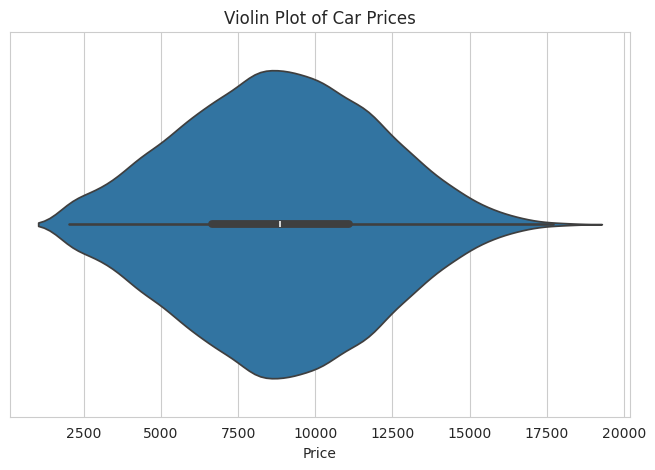

In [36]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['Price'])
plt.title("Violin Plot of Car Prices")
plt.show()

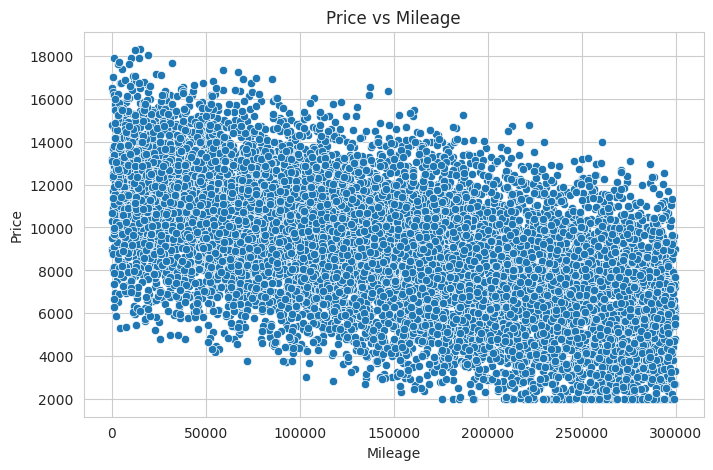

In [37]:
if 'Mileage' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df['Mileage'], y=df['Price'])
    plt.title("Price vs Mileage")
    plt.xlabel("Mileage")
    plt.ylabel("Price")
    plt.show()

In [38]:
if 'Brand' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=df['Brand'].value_counts().index[:10], y=df.groupby('Brand')['Price'].mean().nlargest(10))
    plt.xticks(rotation=45)
    plt.title("Top 10 Brands by Average Price")
    plt.show()

In [39]:
if 'Brand' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df['Brand'], order=df['Brand'].value_counts().index[:10])
    plt.title("Top 10 Car Brands by Count")
    plt.show()

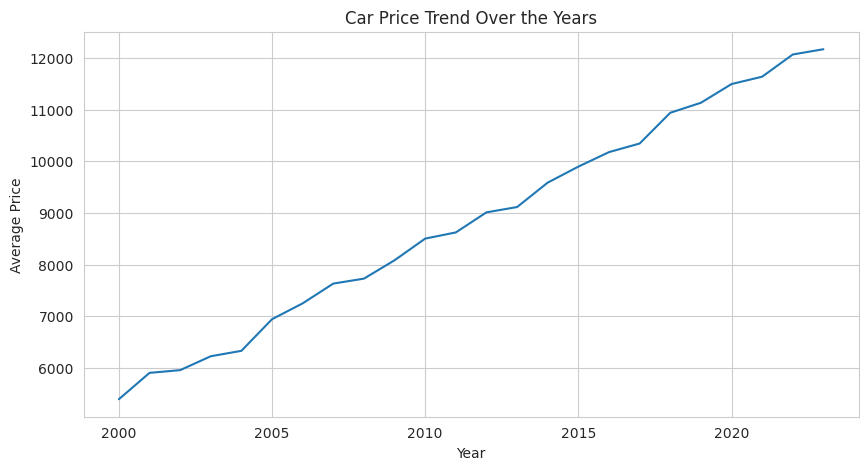

In [41]:
if 'Year' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df.groupby('Year')['Price'].mean().index, y=df.groupby('Year')['Price'].mean())
    plt.title("Car Price Trend Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Average Price")
    plt.show()


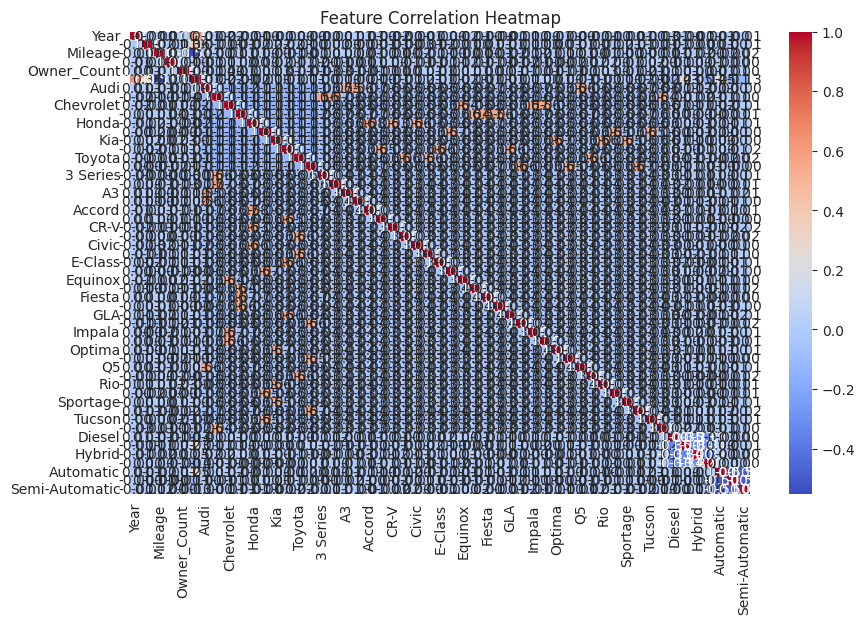

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [43]:
sns.pairplot(df[['Price', 'Mileage', 'EngineSize']] if 'Mileage' in df.columns and 'EngineSize' in df.columns else df)
plt.show()

In [44]:
if 'EngineSize' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=df['EngineSize'], y=df['Price'])
    plt.title("Regression Plot: Price vs Engine Size")
    plt.xlabel("Engine Size")
    plt.ylabel("Price")
    plt.show()

In [45]:
if 'FuelType' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.swarmplot(x=df['FuelType'], y=df['Price'])
    plt.title("Price by Fuel Type")
    plt.show()

In [46]:
if 'Transmission' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxenplot(x=df['Transmission'], y=df['Price'])
    plt.title("Price by Transmission")
    plt.show()

In [47]:
if 'CarType' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.stripplot(x=df['CarType'], y=df['Price'], jitter=True)
    plt.title("Price by Car Type")
    plt.show()

In [48]:
if 'FuelType' in df.columns:
    fuel_counts = df['FuelType'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(fuel_counts, labels=fuel_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title("Fuel Type Distribution")
    plt.show()

In [49]:
if 'Brand' in df.columns:
    text = " ".join(df['Brand'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Car Brands")
    plt.show()

In [50]:
if 'Brand' in df.columns:
    brand_counts = df['Brand'].value_counts().nlargest(10)
    plt.figure(figsize=(10, 6))
    squarify.plot(sizes=brand_counts.values, label=brand_counts.index, alpha=0.7)
    plt.title("Treemap of Top 10 Car Brands")
    plt.axis("off")
    plt.show()


In [51]:
if 'EngineSize' in df.columns:
    sns.jointplot(x=df['EngineSize'], y=df['Price'], kind="scatter")
    plt.show()

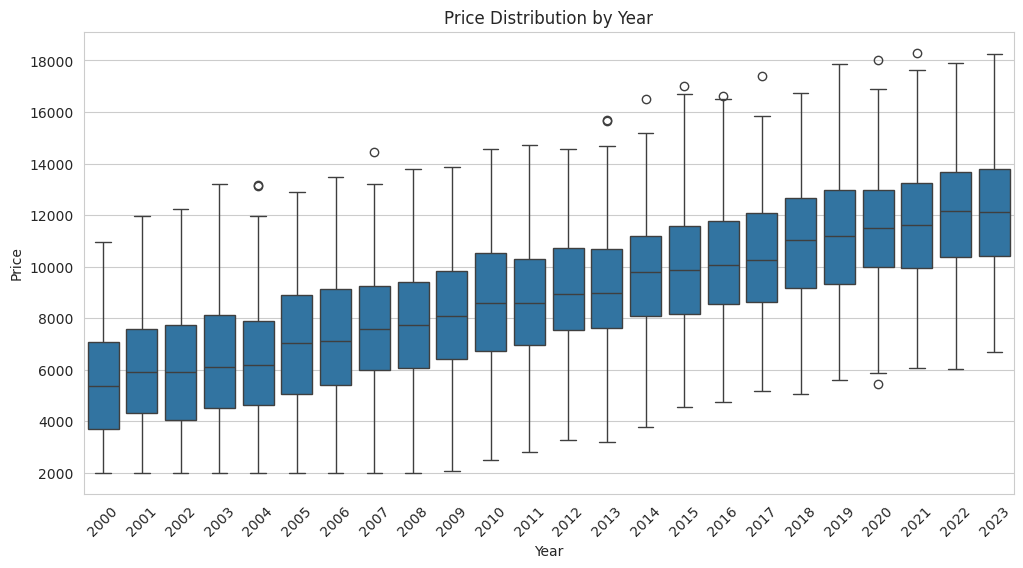

In [52]:
if 'Year' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['Year'], y=df['Price'])
    plt.xticks(rotation=45)
    plt.title("Price Distribution by Year")
    plt.show()


In [53]:
if 'EngineSize' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.heatmap(pd.crosstab(df['EngineSize'], df['Price']), cmap="coolwarm")
    plt.title("Engine Size vs Price Heatmap")
    plt.show()